In [1]:
import music21 as msc
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
s = msc.corpus.parse('bach/bwv65.2.xml')
s.analyze('key')

<music21.key.Key of a minor>

In [44]:
f = msc.note.Note('F4')
f.pitch.pitchClassString

'5'

In [48]:
f.pitch.spanish

'fa'

In [64]:
sil = msc.note.Rest
sil.quarterLength == 1.0

True

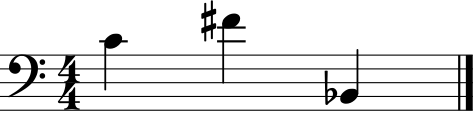

In [71]:
note1 = msc.note.Note("C4")
note2 = msc.note.Note("F#4")
note3 = msc.note.Note("B-2")

stream1 = msc.stream.Stream()
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)
stream1.show()

In [74]:
stream1.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note F#>
{2.0} <music21.note.Note B->


In [76]:
for thisNote in stream1.getElementsByClass(msc.note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B-> 2.0


In [2]:
sBach = msc.corpus.parse('bach/bwv57.8')
#sBach.show()

In [177]:
soprano = sBach[1].flat # parte de la soprano, stream con offset "absoluto"
soprano_elem = soprano.getElementsByClass(msc.note.Note) # elementos de la soprano en orden
L = len(soprano_elem) # londitud de la obra en notas
soprano_notas = list(np.zeros(L)) # lista de los nombres de nodos (tono+duracion), para construir los enlaces

for i,elem in enumerate(soprano_elem):
    soprano_notas[i] = str(elem.nameWithOctave)+'|'+str(elem.quarterLength)
    #soprano_notas[i] = str(elem.pitch.spanish)+str(elem.octave)+'|'+str(elem.quarterLength) #idem anterior con nombre en español

In [227]:
# Creacion del grafo

G = nx.DiGraph() # grafo dirigido

# Agrego nodos
for i in range(L): # recorro cada nota de la obra de longitud L
    if not G.has_node(soprano_notas[i]): # Si el grafo no tiene el nodo, lo agrego con los atributos que quiera
        nodo = str(soprano_notas[i])
        G.add_node(nodo)
        G.node[nodo]['freq']=soprano_elem[i].pitch.frequency
        G.node[nodo]['octava']=soprano_elem[i].octave
        G.node[nodo]['duracion']=soprano_elem[i].quarterLength

# Agrego enlaces
for i in range(L-1): # recorro desde la primera hasta la anteultima nota, y la uno con la siguiente
    if G.has_edge(soprano_notas[i], soprano_notas[i+1]): # si el enlace ya existe, se le agrega +1 al peso
        G[soprano_notas[i]][soprano_notas[i+1]]['weight'] += 1
    else: # si el enlace no existe, se crea con peso 1
        G.add_edge(soprano_notas[i],soprano_notas[i+1], weight=1)


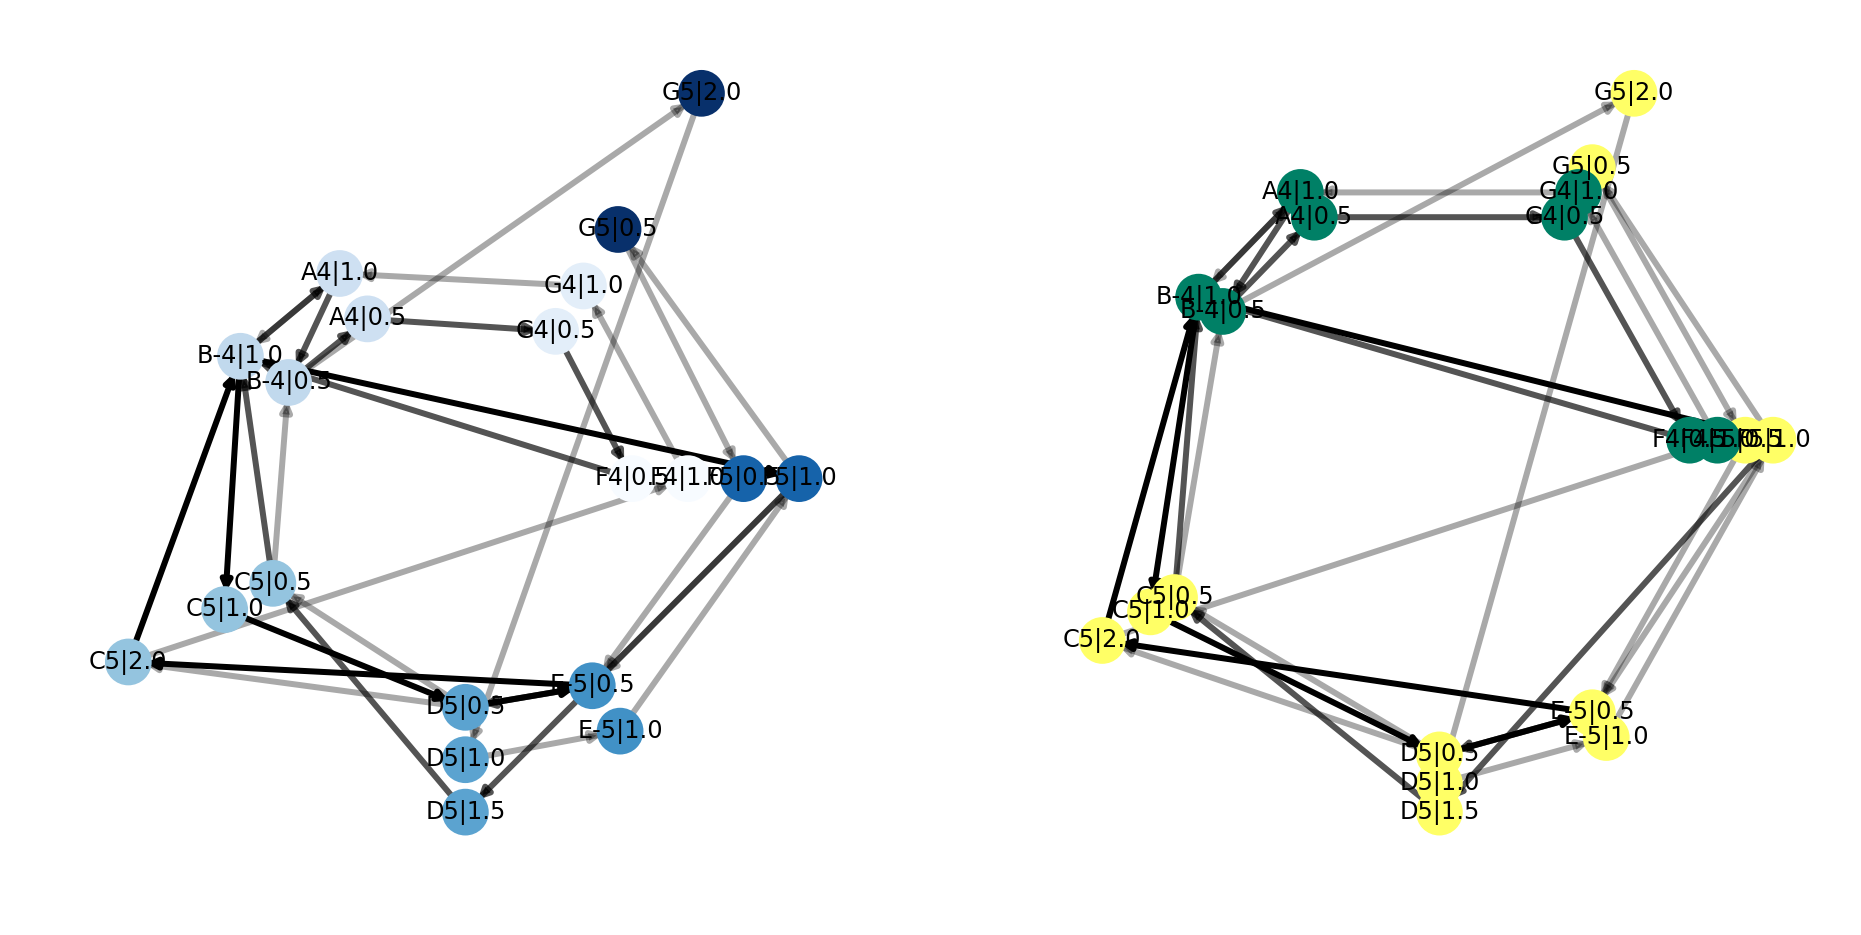

In [242]:
plt.figure(figsize=(16, 8))
M = G.number_of_edges()
N = G.number_of_nodes()
nodos = list(nx.get_node_attributes(G,'freq').keys())

plt.subplot(1,2,1)
freqs = np.array(list(nx.get_node_attributes(G,'freq').values()))
freq_min = min(freqs)
freq_max = max(freqs)
colores_blues_nro = (freqs-freq_min)/(freq_max-freq_min)
colores_blues = [ cm.Blues(x) for x in colores_blues_nro ]

pos1 = dict()

for nodo in nodos:
    f = G.node[nodo]['freq']
    d = G.node[nodo]['duracion']
    theta = 2*np.pi * np.log2(f/freq_min)
    x = np.cos(theta)*(f/freq_min+d)
    y = np.sin(theta)*(f/freq_min+d)
    pos1[nodo] = np.array([x,y])

nx.draw_networkx_nodes(G,pos1,node_list=nodos,node_size=500,alpha=1,node_color=colores_blues)
nx.draw_networkx_labels(G,pos1)
edges = nx.draw_networkx_edges(G,pos1,width=3)
weights = list(nx.get_edge_attributes(G,'weight').values())
weight_max = max(weights)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(weights[i]/weight_max)
plt.axis('off')

plt.subplot(1,2,2)
nodos = list(nx.get_node_attributes(G,'octava').keys())
octavas = np.array(list(nx.get_node_attributes(G,'octava').values()))
oct_min = min(octavas)
oct_max = max(octavas)
colores_oct_nro = (octavas-oct_min)/(oct_max-oct_min)
colores_oct = [ cm.summer(x) for x in colores_oct_nro ]

pos2 = dict()

for nodo in nodos:
    f = G.node[nodo]['freq']
    d = G.node[nodo]['duracion'] # OJO! corregir la duracion porque se pueden superponer
    nro_oct = G.node[nodo]['octava']
    theta = 2*np.pi * np.log2(f/freq_min)
    x = np.cos(theta)*(nro_oct+d)
    y = np.sin(theta)*(nro_oct+d)
    pos2[nodo] = np.array([x,y])

nx.draw_networkx_nodes(G,pos2,node_list=nodos,node_size=500,alpha=1,node_color=colores_oct)
nx.draw_networkx_labels(G,pos2)
edges = nx.draw_networkx_edges(G,pos2,width=3)
weights = list(nx.get_edge_attributes(G,'weight').values())
weight_max = max(weights)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(weights[i]/weight_max)
plt.axis('off')

plt.show()


In [2]:
from funciones import *

Parte seleccionada: Flute


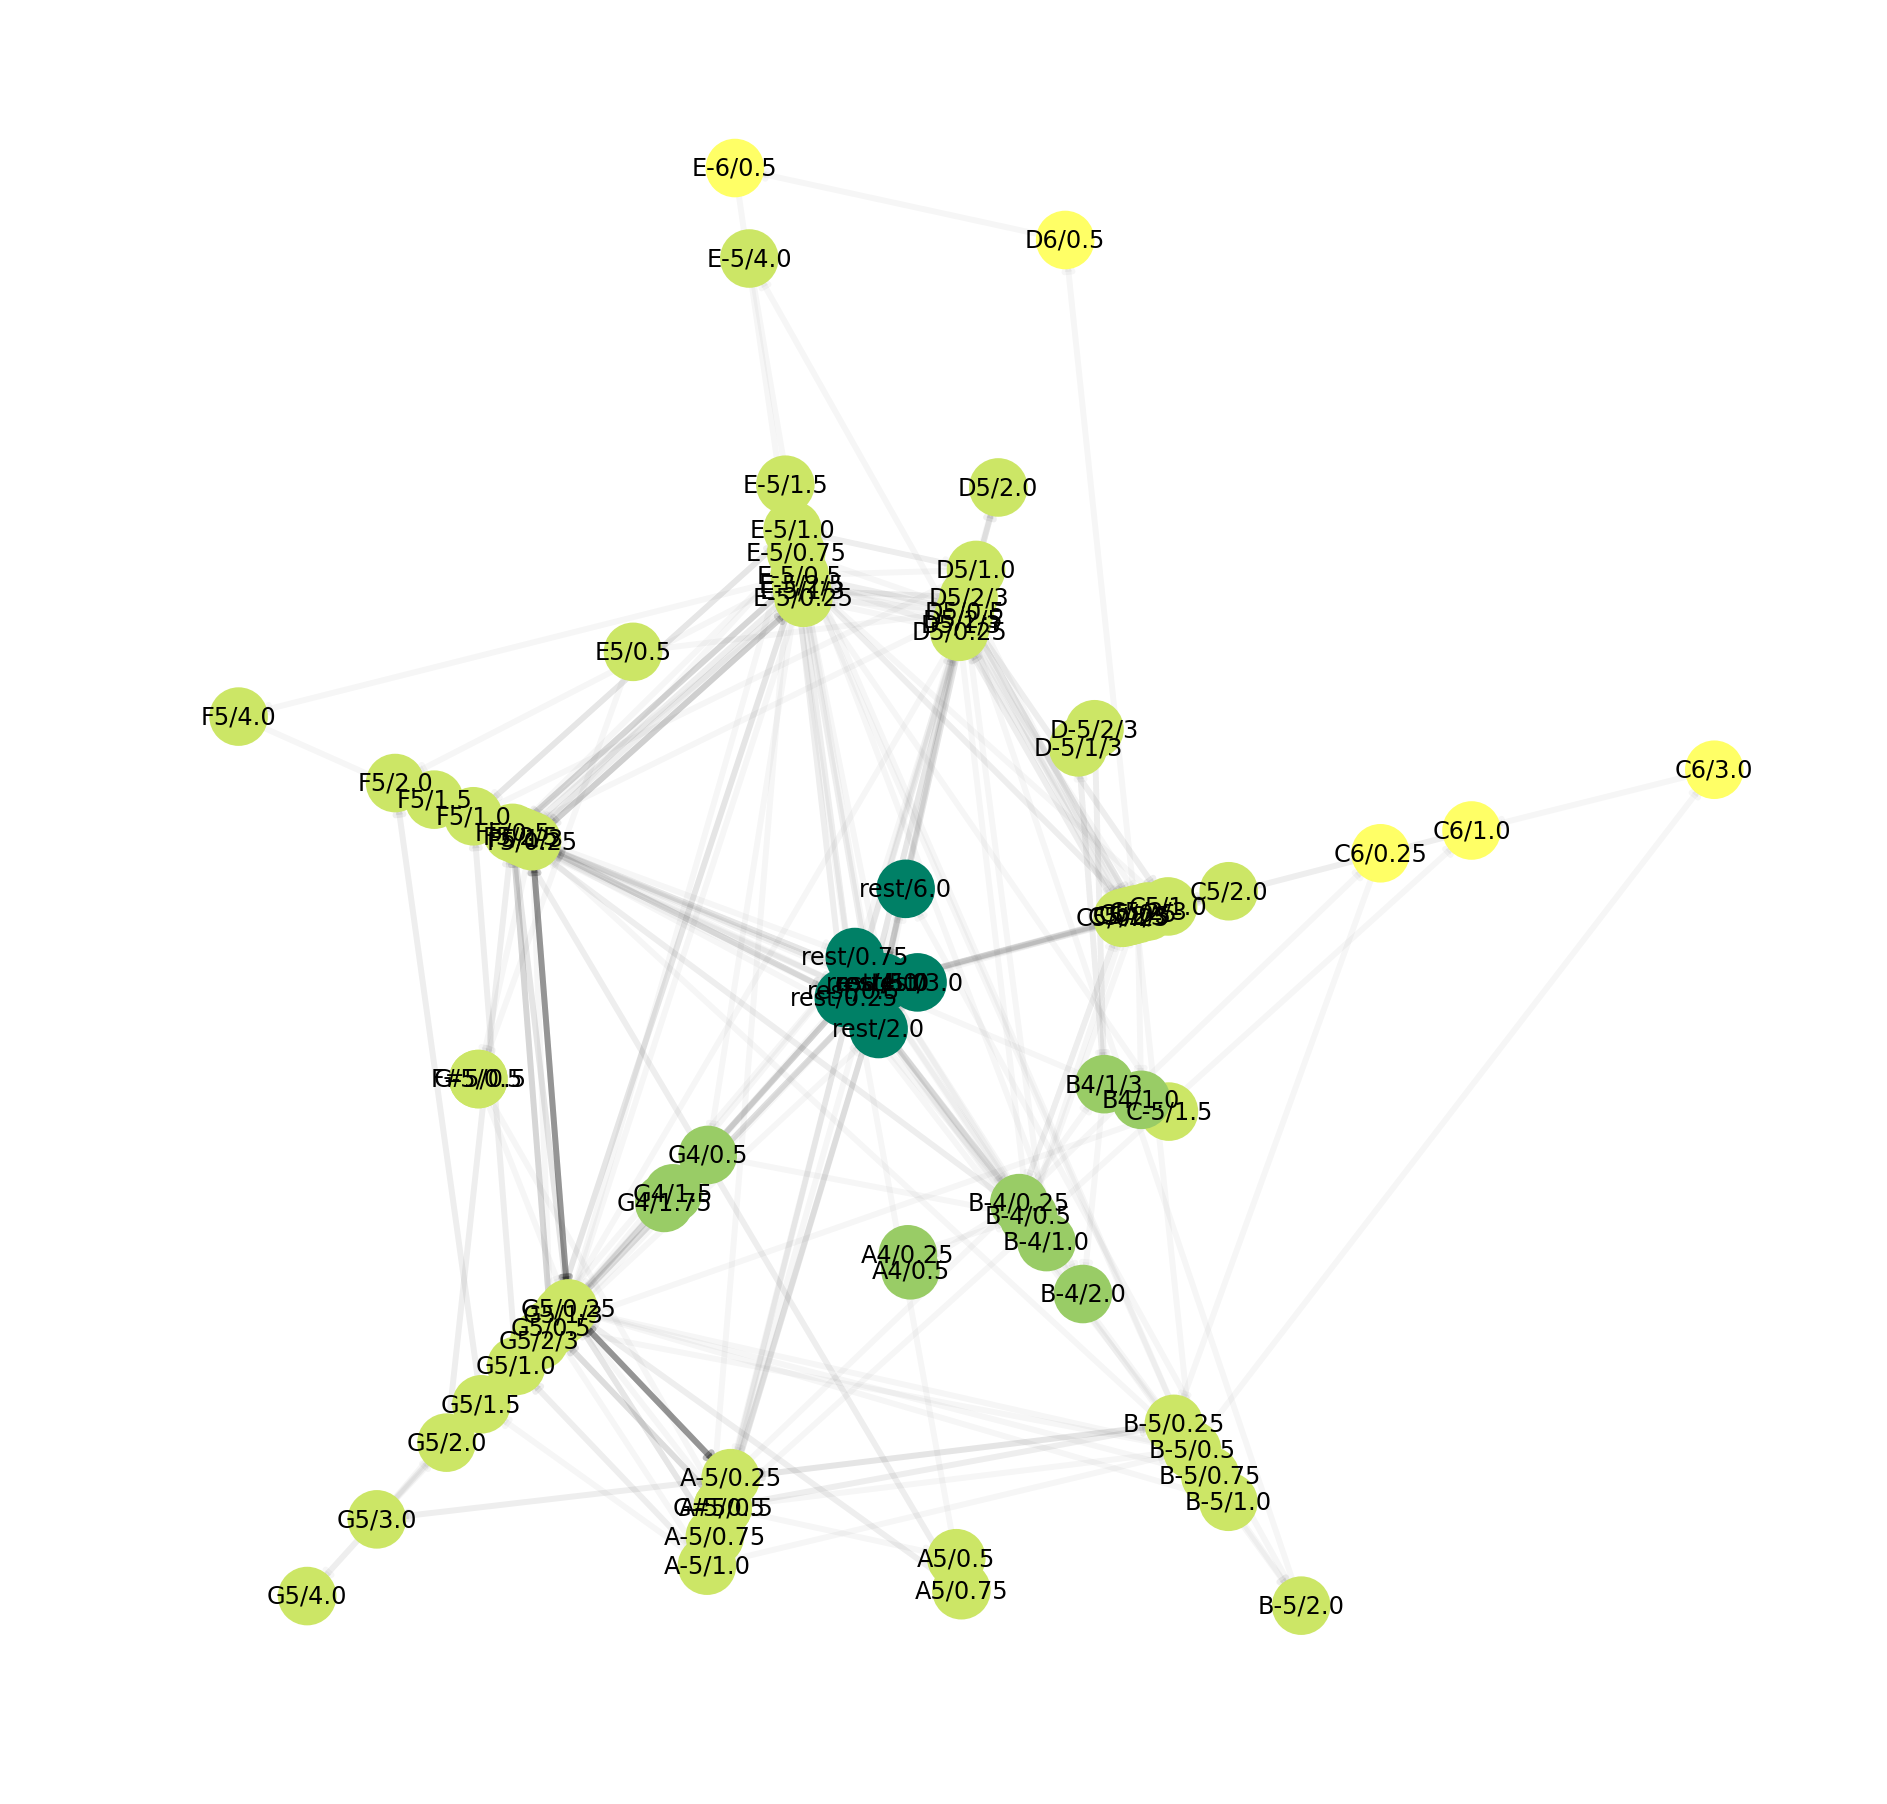

In [3]:
G_b = f_xml2graph('.\partituras\Queen_-_Bohemian_Rhapsody.mxl')
plt.figure(figsize=(16,16))
graficar(G_b)

Bass no está entre las partes: ['Clean Guitar 1', 'Clean Guitar 2', 'Overdrive Guitar', 'Bass Guitar', 'Koto', 'Voice', 'Synth. Voice', 'Piano', 'Piano', 'Organ', 'Hand Clap', 'Finger Snap', 'Drumset']. Parte seleccionada: Clean Guitar 1


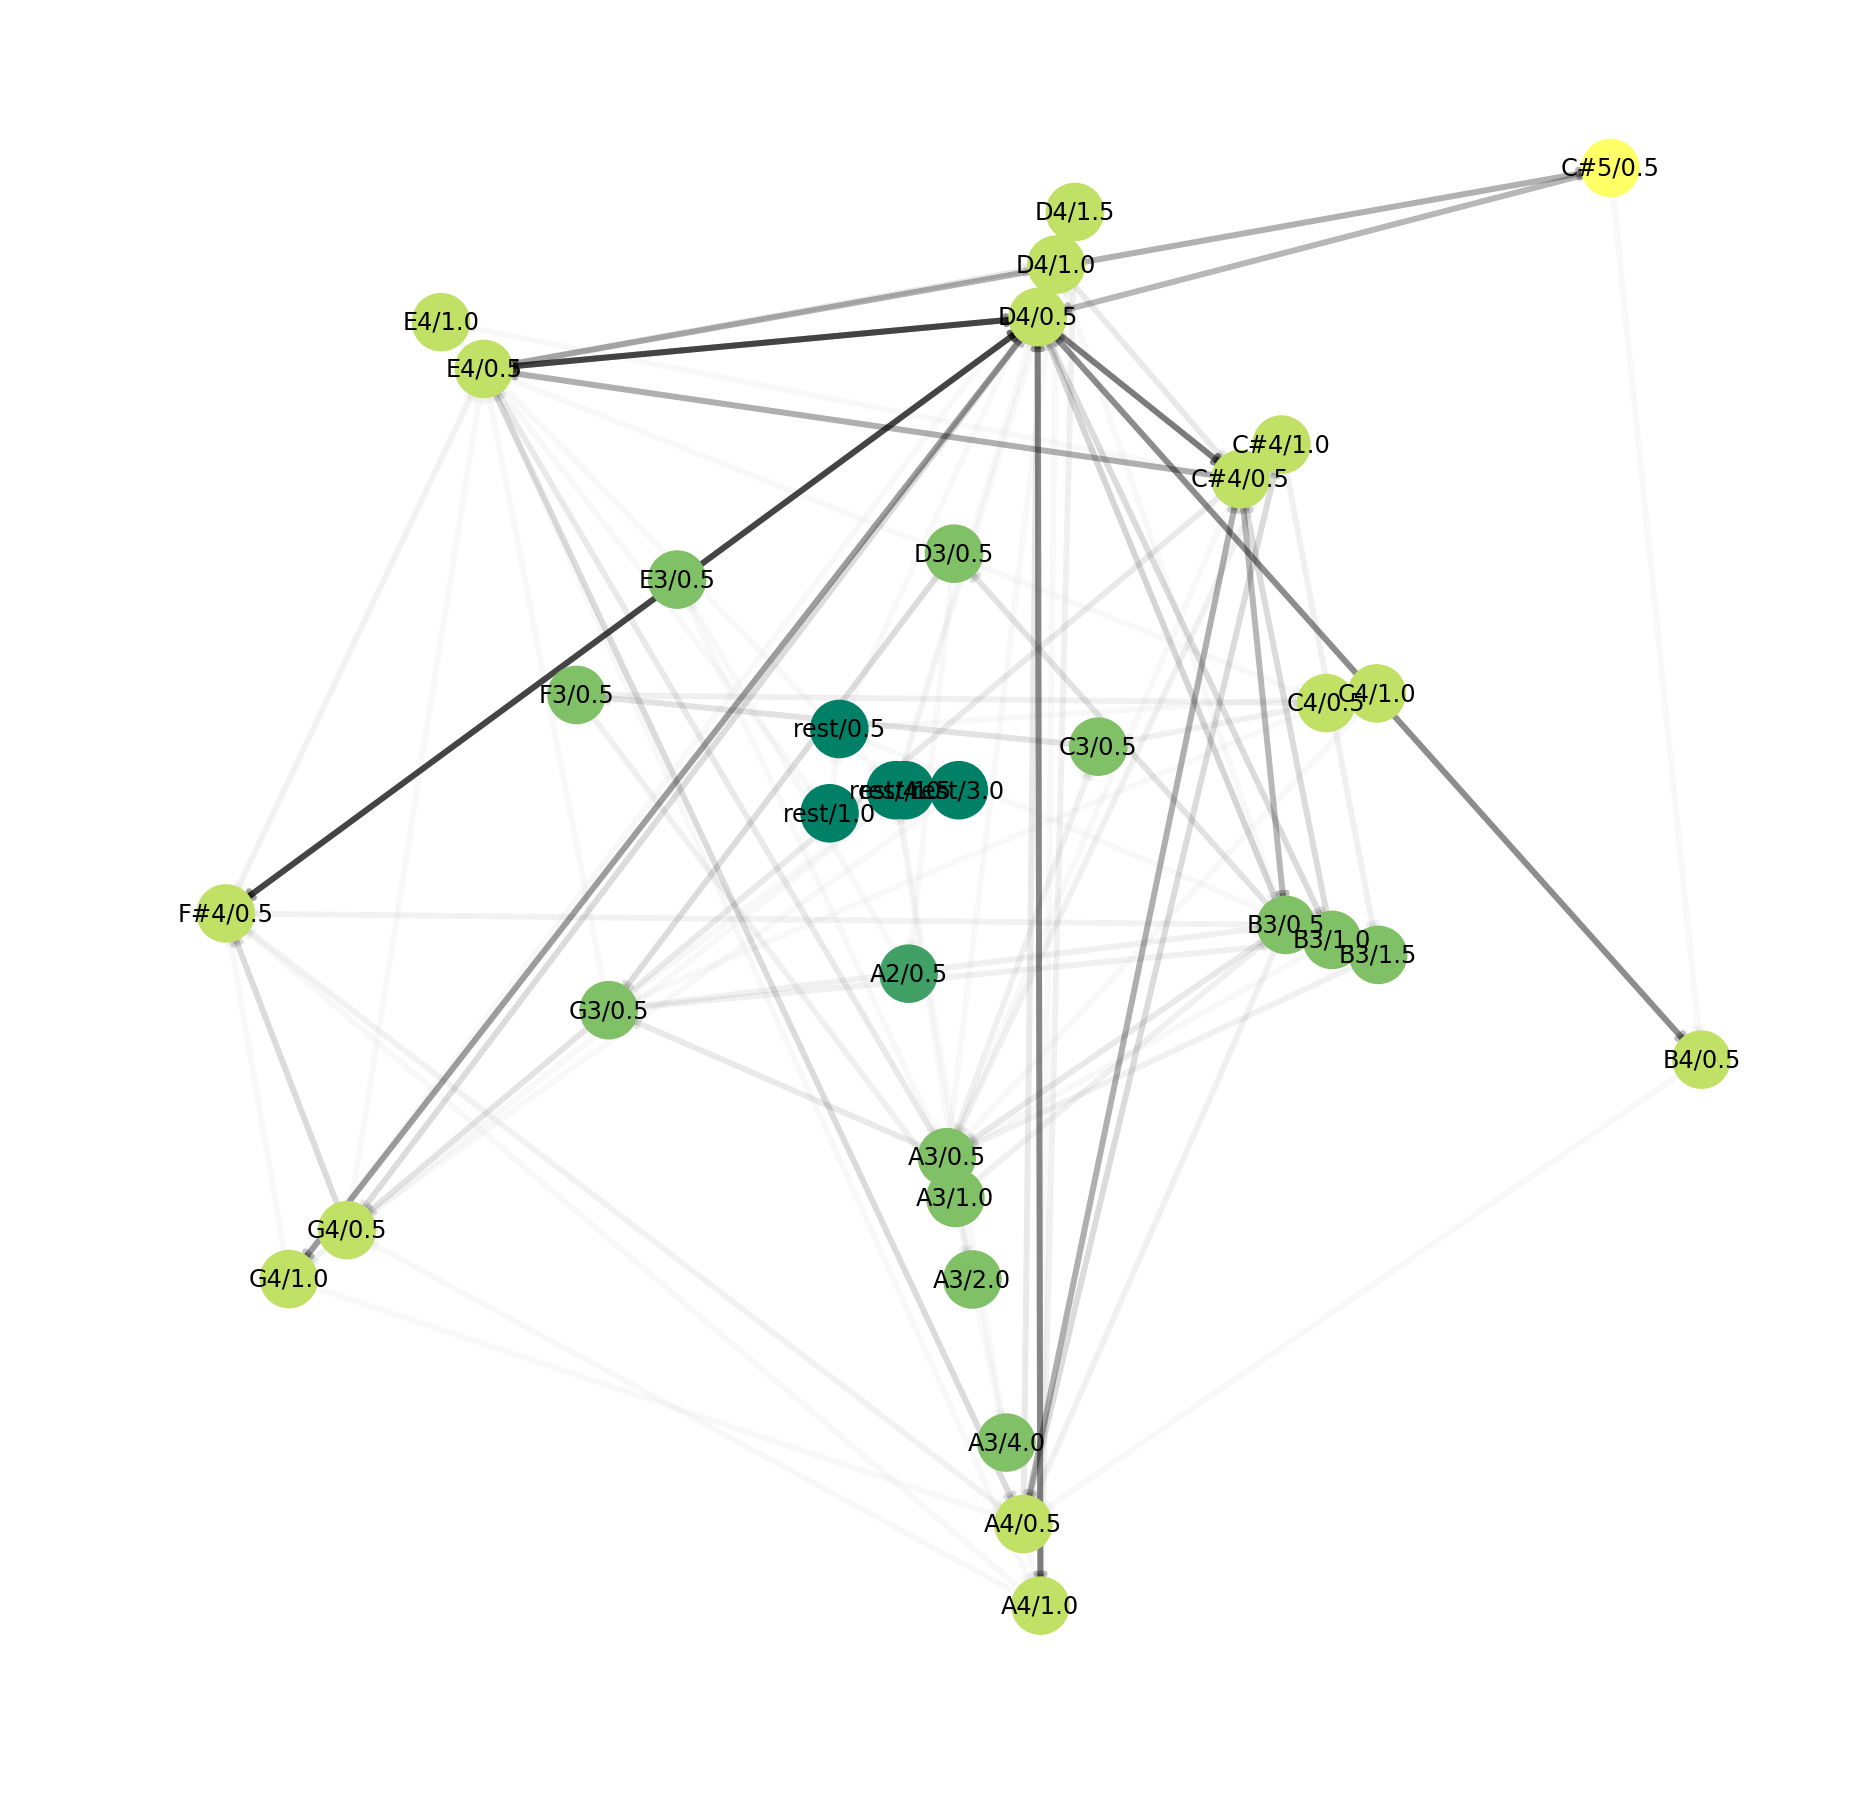

In [9]:
G_up = f_xml2graph(r'.\partituras\Under_Pressure_No_Vocals_Complete_Transcription.mxl',nombre_parte='Bass')
plt.figure(figsize=(16,16))
graficar(G_up)